In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [ ]:
#Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of      sepal.length  sepal.width  petal.length  petal.width  variety
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]>

In [ ]:
iris.variety

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [ ]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[]

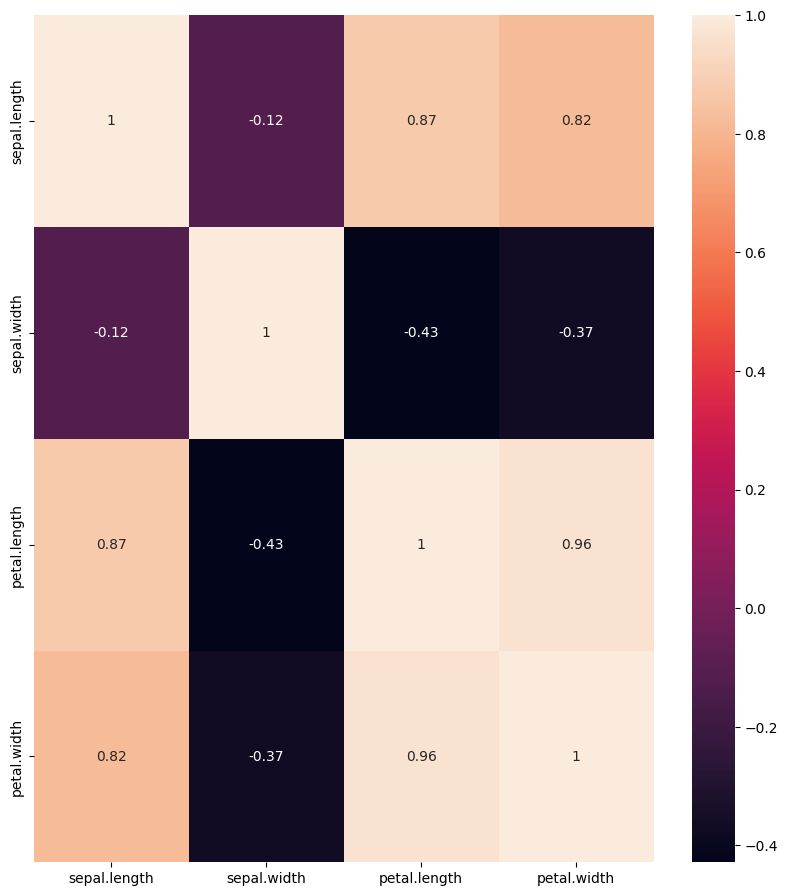

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

<Axes: xlabel='variety', ylabel='petal.width'>

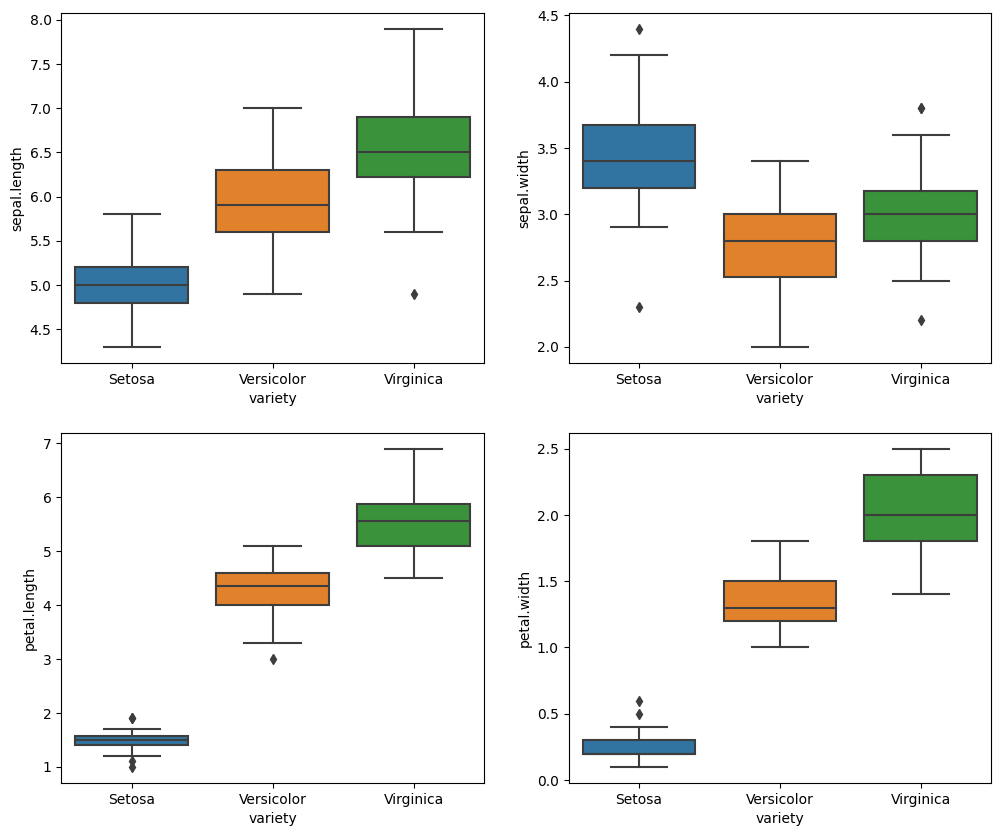

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="variety",y="sepal.length",data=iris)
plt.subplot(2,2,2)
sns.boxplot(x="variety",y="sepal.width",data=iris)
plt.subplot(2,2,3)
sns.boxplot(x="variety",y="petal.length",data=iris)
plt.subplot(2,2,4)
sns.boxplot(x="variety",y="petal.width",data=iris)

DECISION TREE CLASSIFIER - Using variety

In [ ]:
y = iris['variety']
y.head

<bound method NDFrame.head of 0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object>

In [ ]:
iris = iris.drop('variety',1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(iris, y, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape, Y_train.shape)

(135, 4) (135,)


In [ ]:
print(X_test.shape, Y_test.shape)

(15, 4) (15,)


In [ ]:
#scikit learn decision tree model training 
DT = tree.DecisionTreeClassifier( )
DT = DT.fit(X_train, Y_train)

In [ ]:
DT.predict(X_test)
prediction = DT.predict(X_test)

In [ ]:
prediction = DT.predict(X_test)
prediction

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
# evaluation for multi class classification
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         6
  Versicolor       1.00      1.00      1.00         6
   Virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
DT.score(X_test, Y_test)

1.0

In [ ]:
#prediction
Y_pred = DT.predict(X_test)

In [ ]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 1.0


In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[6, 0, 0],
       [0, 6, 0],
       [0, 0, 3]])

In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

print text representation of the tree with sklearn.tree.export_text method

In [ ]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Virginica



Plot Tree with plot_tree

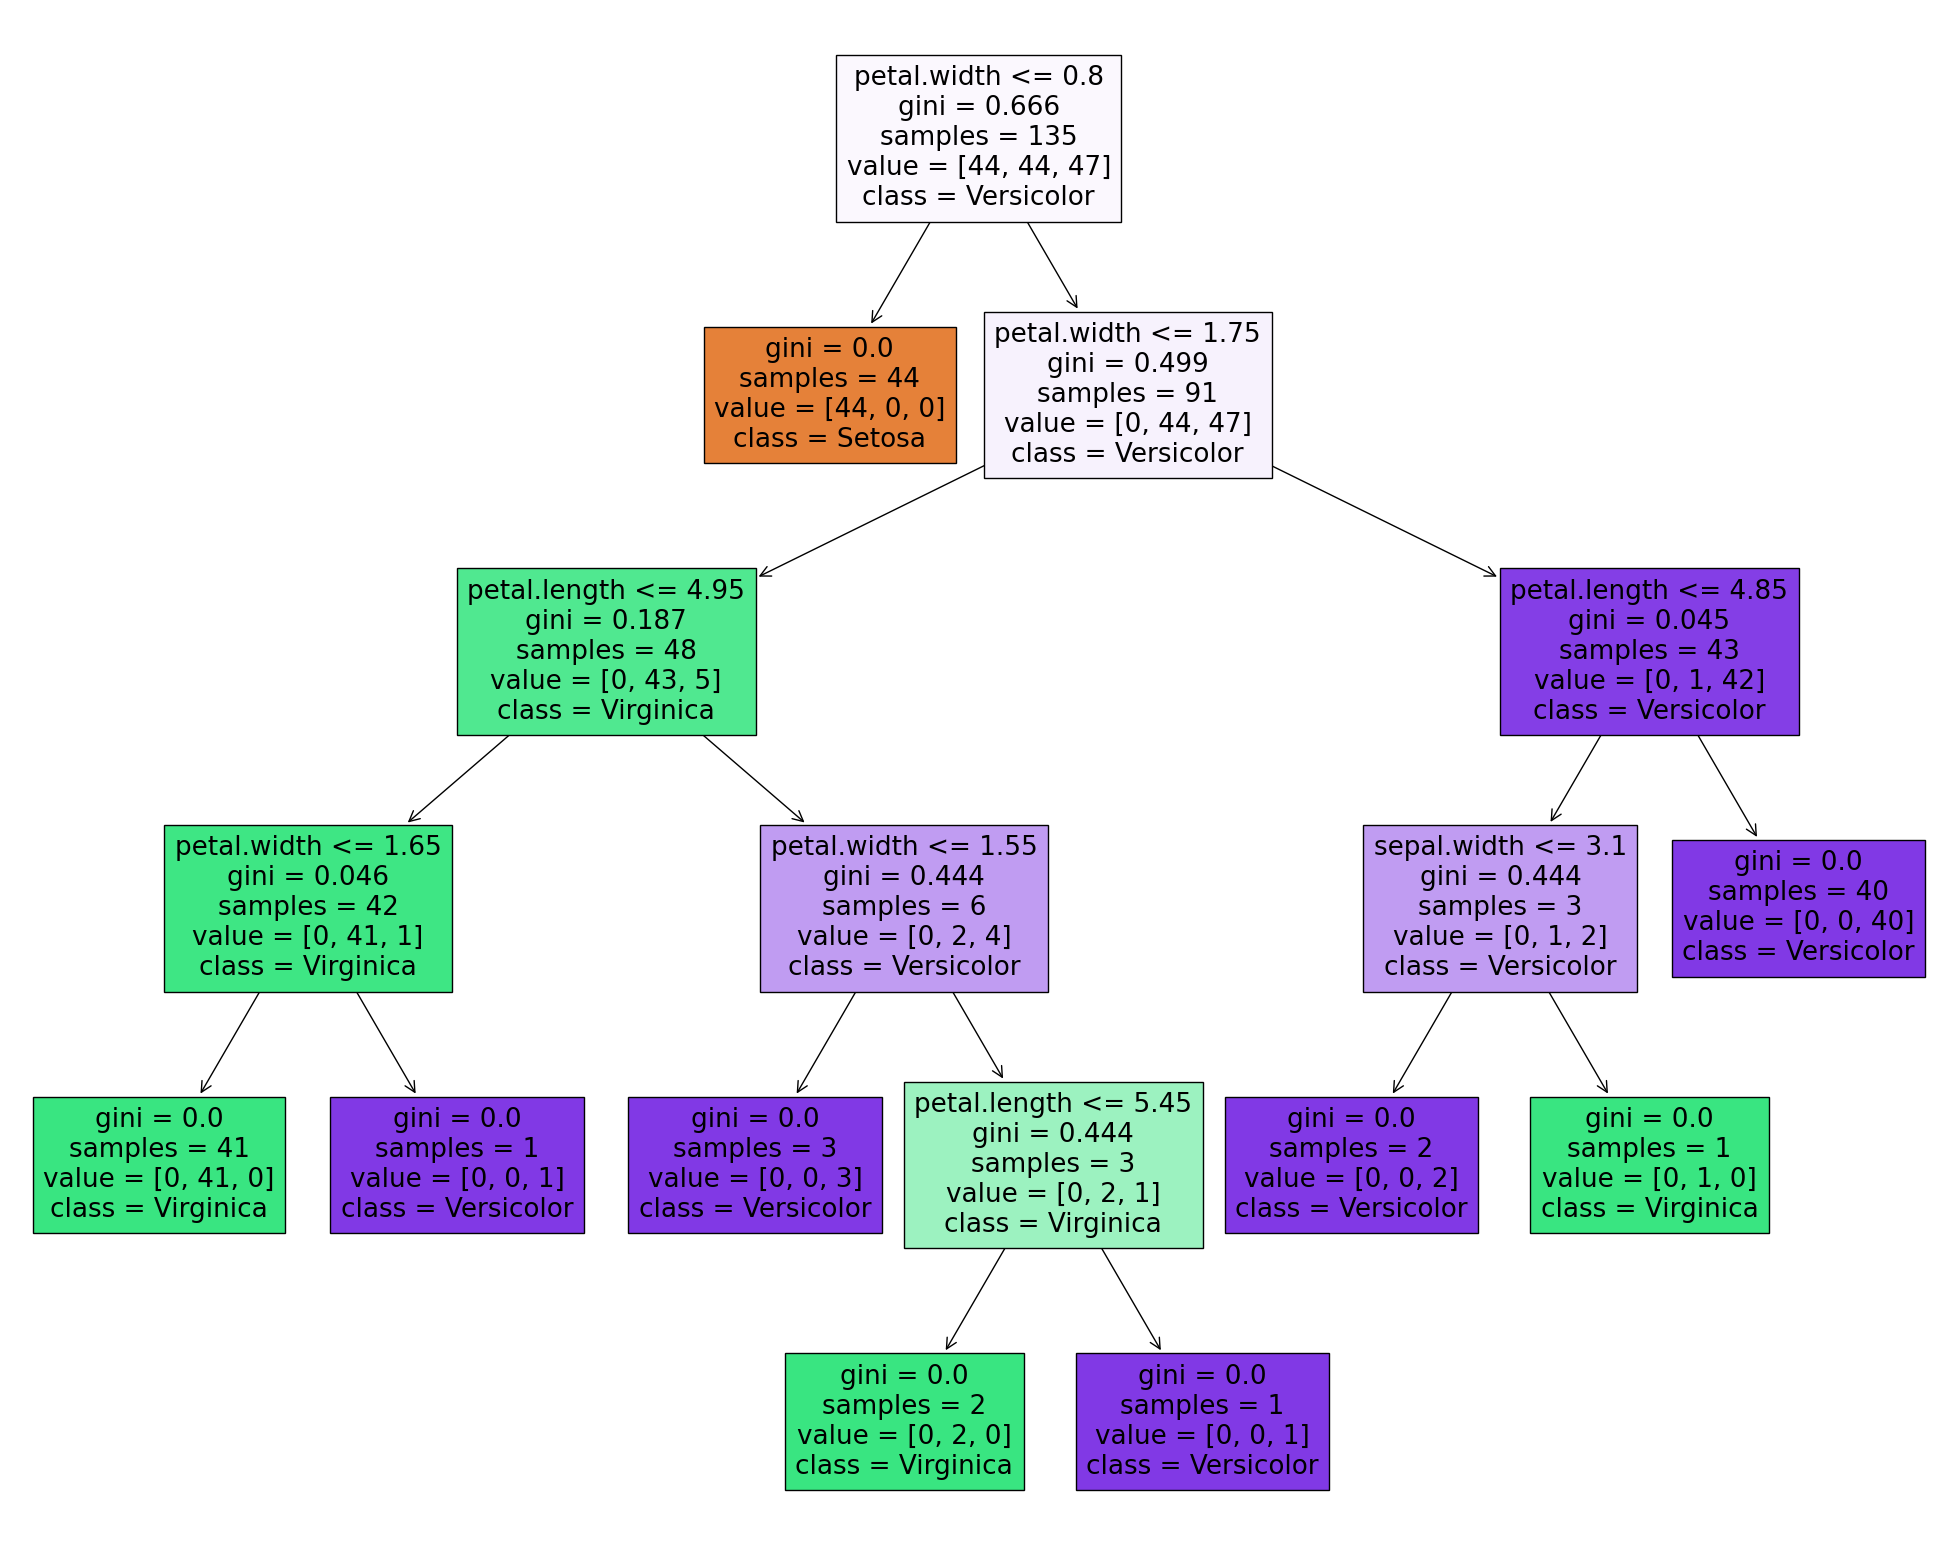

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=iris.columns,
                   class_names=['Setosa','Virginica','Versicolor'],
                   filled=True)

###Plot Decision Tree with graphviz

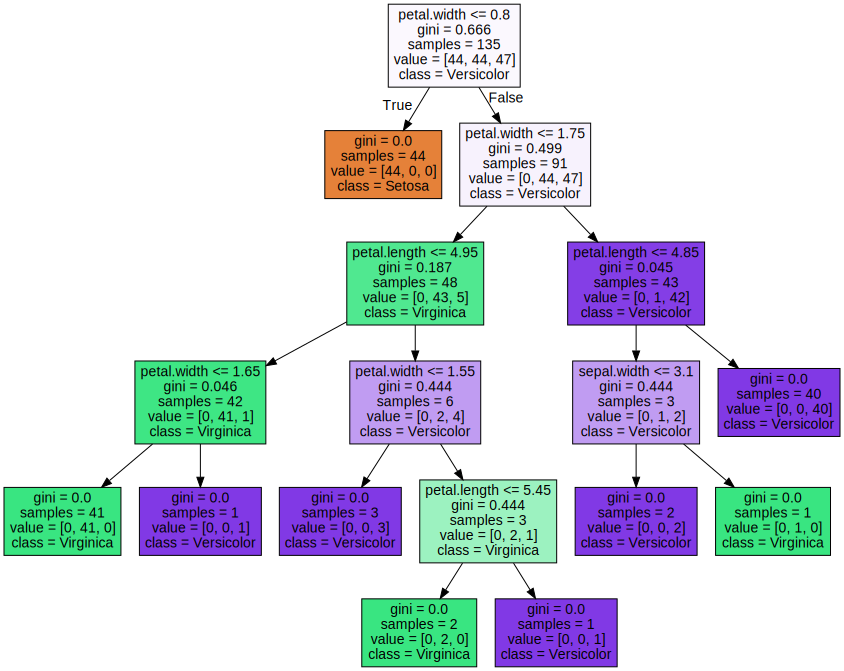

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=iris.columns, 
                                class_names=['Setosa','Virginica','Versicolor'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
#to save
graph.render("output_DecisionTree/iris_DecisionTree_graphivz1")

'output_DecisionTree/iris_DecisionTree_graphivz1.png'

WITH STRINGIO

Import Successful


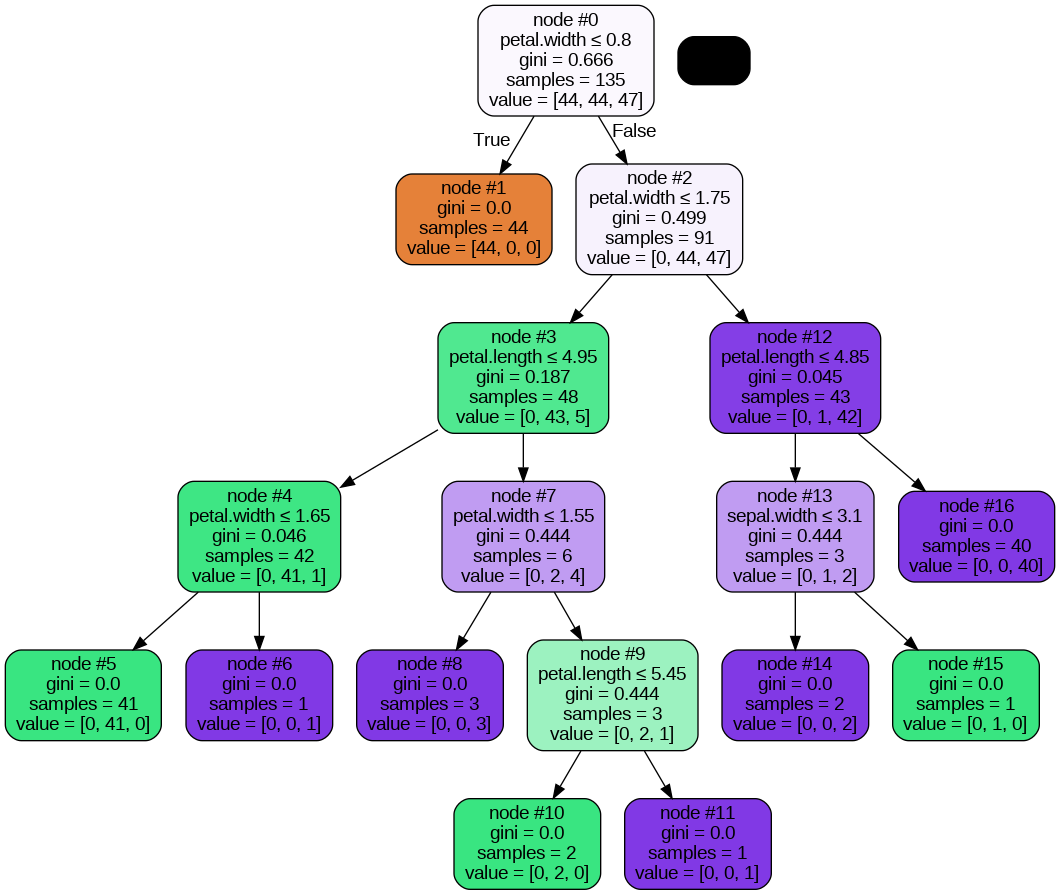

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
print("Import Successful")

# Visualizing Decision Tree

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, 
                feature_names = iris.columns,
                filled = True, rounded = True, 
                special_characters = True, node_ids = True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

# Generate .png image of "Decision Tree"
Image(graph.create_png())